In [3]:
import os
import shutil

def find_single_line_files(labels_folder):
    """
    Finds text files in the labels folder that contain only a single line.

    Parameters:
        labels_folder (str): Path to the folder containing text files.

    Returns:
        List[str]: Names of text files with a single line (without extensions).
    """
    single_line_files = []

    for filename in os.listdir(labels_folder):
        file_path = os.path.join(labels_folder, filename)

        # Check if it is a text file
        if os.path.isfile(file_path) and filename.endswith(".txt"):
            # Read the file and count lines
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                if len(lines) == 1:
                    single_line_files.append(os.path.splitext(filename)[0])  # Exclude the .txt extension

    return single_line_files


def copy_corresponding_images(single_line_files, images_folder, destination_folder):
    """
    Copies images corresponding to single-line text files to a new folder.

    Parameters:
        single_line_files (List[str]): List of text file names (without extensions).
        images_folder (str): Path to the folder containing images.
        destination_folder (str): Path to the folder where images will be copied.
    """
    # Create destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Define valid image extensions
    valid_extensions = {".jpg", ".jpeg", ".png"}

    # Copy images corresponding to single-line text files
    for filename in os.listdir(images_folder):
        file_path = os.path.join(images_folder, filename)
        file_base, file_ext = os.path.splitext(filename)

        if file_base in single_line_files and file_ext.lower() in valid_extensions:
            shutil.copy(file_path, destination_folder)
            print(f"Copied: {filename}")

    print(f"All corresponding images have been copied to {destination_folder}.")


# Example usage
labels_folder = '/home/gok/Downloads/out3/kaggle/working/runs/detect/exp/labels'
images_folder = '/home/gok/Downloads/out3/kaggle/working/runs/detect/exp'
destination_folder = './single_line_images3'

#single_line_files = find_single_line_files(labels_folder)
#copy_corresponding_images(single_line_files, images_folder, destination_folder)


In [4]:
import os
import shutil

def move_single_line_images(folder_path):
    """
    Finds image files (.jpg, .jpeg, .png) with a single line of text in a folder
    and copies them to a new folder.

    Parameters:
        folder_path (str): Path to the folder containing image files.
    """
    # Define the valid extensions for images
    valid_extensions = {".jpg", ".jpeg", ".png"}

    # Create a new folder in the current directory
    destination_folder = os.path.join(".", "single_line_images")
    os.makedirs(destination_folder, exist_ok=True)

    # Process files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        file_ext = os.path.splitext(filename)[1].lower()

        # Check if it is an image file with a valid extension
        if os.path.isfile(file_path) and file_ext in valid_extensions:
            # Check if the file contains a single line of text
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    lines = file.readlines()
                    if len(lines) == 1:
                        # Copy the file to the destination folder
                        shutil.copy(file_path, destination_folder)
                        print(f"Copied: {filename}")
            except Exception as e:
                # Skip files that cannot be opened as text
                print(f"Skipped: {filename} (Reason: {e})")

    print(f"All single-line image files have been copied to {destination_folder}.")

# Example usage
#if __name__ == "__main__":
    #folder_path = input("Enter the path to the folder containing image files: ").strip()
    #move_single_line_images(folder_path)

In [5]:
import os
import shutil

def copy_text_files_from_images(images_folder, labels_folder, destination_folder):
    """
    Copies text files from the labels folder corresponding to the base names of files in the images folder.

    Parameters:
        images_folder (str): Path to the folder containing image files.
        labels_folder (str): Path to the folder containing text files.
        destination_folder (str): Path to the folder where text files will be copied.
    """
    # Create destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Collect the base names of files in the images folder (irrespective of extension)
    image_bases = set(os.path.splitext(filename)[0] for filename in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, filename)))

    # Copy text files with matching base names
    for filename in os.listdir(labels_folder):
        file_path = os.path.join(labels_folder, filename)
        file_base, file_ext = os.path.splitext(filename)

        if file_base in image_bases and file_ext == ".txt":
            shutil.copy(file_path, destination_folder)
            print(f"Copied: {filename}")

    print(f"All corresponding text files have been copied to {destination_folder}.")


# Example usage
images_folder = '/home/gok/Desktop/New Folder 2/single_line_images3'
labels_folder = '/home/gok/Downloads/out3/kaggle/working/runs/detect/exp/labels'
destination_folder = './corresponding_text_files'

copy_text_files_from_images(images_folder, labels_folder, destination_folder)


Copied: meningioma (138).txt
Copied: meningioma (357).txt
Copied: meningioma (229).txt
Copied: glioma (139).txt
Copied: meningioma (239).txt
Copied: meningioma (225).txt
Copied: meningioma (309).txt
Copied: glioma (207).txt
Copied: meningioma (355).txt
Copied: schwannoma (51).txt
Copied: meningioma (121).txt
Copied: meningioma (285).txt
Copied: meningioma (384).txt
Copied: neurocitoma (6).txt
Copied: schwannoma (50).txt
Copied: meningioma (265).txt
Copied: meningioma (316).txt
Copied: glioma (264).txt
Copied: glioma (170).txt
Copied: glioma (73).txt
Copied: meningioma (28).txt
Copied: meningioma (358).txt
Copied: neurocitoma (87).txt
Copied: meningioma (388).txt
Copied: neurocitoma (106).txt
Copied: meningioma (20).txt
Copied: neurocitoma (149).txt
Copied: schwannoma (111).txt
Copied: meningioma (292).txt
Copied: schwannoma (141).txt
Copied: meningioma (354).txt
Copied: glioma (194).txt
Copied: neurocitoma (89).txt
Copied: glioma (246).txt
Copied: meningioma (149).txt
Copied: glioma (2

In [6]:
import os
import cv2
import numpy as np
import math
import re

def process_yolo_annotations(image_folder, labels_folder):
    """
    Processes YOLO annotations to calculate distances to image center and contrast.

    Parameters:
        image_folder (str): Path to the folder containing images.
        labels_folder (str): Path to the folder containing YOLO label files.

    Returns:
        List of results with distances and contrast for each detected object.
    """
    results = []
    image_center_x = image_center_y = 630 / 2  # Image center for 630x630 images

    for label_file in os.listdir(labels_folder):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_folder, label_file)
        
        # Extract the base name from the label file
        base_name_match = re.match(r'([a-zA-Z]+)', label_file)
        if not base_name_match:
            print(f"Invalid label file name: {label_file}")
            continue
        base_name = base_name_match.group(1)

        # Match the image with the same base name
        matching_images = [
            img for img in os.listdir(image_folder)
            if img.startswith(base_name) and img.endswith((".jpg", ".jpeg", ".png"))
        ]

        if not matching_images:
            print(f"No matching image found for label {label_file}")
            continue

        image_name = matching_images[0]  # Assuming one match per label
        image_path = os.path.join(image_folder, image_name)

        # Extract the class name from the image name
        class_name_match = re.match(r'([a-zA-Z]+)', image_name)
        class_name = class_name_match.group(1) if class_name_match else "unknown"

        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Unable to load {image_name}")
            continue

        with open(label_path, 'r') as file:
            for line in file:
                values = line.strip().split()
                if len(values) != 5:
                    continue  # Skip invalid lines

                class_id, center_x, center_y, box_width, box_height = map(float, values)
                center_x *= 630
                center_y *= 630
                box_width *= 630
                box_height *= 630

                # Calculate distances
                distance_to_x_center = abs(center_x - image_center_x)
                distance_to_y_center = abs(center_y - image_center_y)
                total_distance = math.sqrt(distance_to_x_center**2 + distance_to_y_center**2)

                # Extract bounding box region
                x1 = max(0, int(center_x - box_width / 2))
                y1 = max(0, int(center_y - box_height / 2))
                x2 = min(630, int(center_x + box_width / 2))
                y2 = min(630, int(center_y + box_height / 2))
                bbox = image[y1:y2, x1:x2]

                # Calculate contrast
                if bbox.size > 0:
                    contrast = bbox.max() - bbox.min()
                else:
                    contrast = 0

                # Append results
                results.append({
                    "image": image_name,
                    "class_name": class_name,
                    "center_x": center_x,
                    "center_y": center_y,
                    "distance_to_x_center": distance_to_x_center,
                    "distance_to_y_center": distance_to_y_center,
                    "total_distance": total_distance,
                    "contrast": contrast,
                    "bbox": (x1, y1, x2, y2)
                })

    return results


# Example usage
image_folder = '/home/gok/Desktop/New Folder 2/single_line_images3'
labels_folder = '/home/gok/Desktop/New Folder 2/corresponding_text_files'

results = process_yolo_annotations(image_folder, labels_folder)
for result in results:
    print(result)


{'image': 'meningioma (40).jpg', 'class_name': 'meningioma', 'center_x': 349.08362999999997, 'center_y': 248.00012999999998, 'distance_to_x_center': 34.08362999999997, 'distance_to_y_center': 66.99987000000002, 'total_distance': 75.1709811961624, 'contrast': np.uint8(241), 'bbox': (258, 173, 439, 323)}
{'image': 'meningioma (40).jpg', 'class_name': 'meningioma', 'center_x': 331.83234, 'center_y': 325.9998, 'distance_to_x_center': 16.832339999999988, 'distance_to_y_center': 10.999799999999993, 'total_distance': 20.107791273921645, 'contrast': np.uint8(48), 'bbox': (301, 303, 361, 347)}
{'image': 'meningioma (40).jpg', 'class_name': 'meningioma', 'center_x': 430.49978999999996, 'center_y': 211.49982, 'distance_to_x_center': 115.49978999999996, 'distance_to_y_center': 103.50018, 'total_distance': 155.08864803742566, 'contrast': np.uint8(254), 'bbox': (366, 151, 493, 270)}
{'image': 'glioma (115).jpeg', 'class_name': 'glioma', 'center_x': 427.00014, 'center_y': 211.00023000000002, 'distanc

In [7]:
import os
import cv2
import numpy as np
import math
import re
import pandas as pd

def process_yolo_annotations(image_folder, labels_folder):
    """
    Processes YOLO annotations to calculate distances to image center and contrast.

    Parameters:
        image_folder (str): Path to the folder containing images.
        labels_folder (str): Path to the folder containing YOLO label files.

    Returns:
        List of results with distances and contrast for each detected object.
    """
    image_names = []
    class_names = []
    center_xs = []
    center_ys = []
    distance_to_x_centers = []
    distance_to_y_centers = []
    total_distances = []
    contrasts = []
    bbox_x1s = []
    bbox_y1s = []
    bbox_x2s = []
    bbox_y2s = []

    image_center_x = image_center_y = 630 / 2  # Image center for 630x630 images

    for label_file in os.listdir(labels_folder):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_folder, label_file)
        
        base_name_match = re.match(r'([a-zA-Z]+)', label_file)
        if not base_name_match:
            print(f"Invalid label file name: {label_file}")
            continue
        base_name = base_name_match.group(1)

        matching_images = [
            img for img in os.listdir(image_folder)
            if img.startswith(base_name) and img.endswith((".jpg", ".jpeg", ".png"))
        ]

        if not matching_images:
            print(f"No matching image found for label {label_file}")
            continue

        image_name = matching_images[0]  # Assuming one match per label
        image_path = os.path.join(image_folder, image_name)

        class_name_match = re.match(r'([a-zA-Z]+)', image_name)
        class_name = class_name_match.group(1) if class_name_match else "unknown"

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Unable to load {image_name}")
            continue

        with open(label_path, 'r') as file:
            for line in file:
                values = line.strip().split()
                if len(values) != 5:
                    continue  # Skip invalid lines

                class_id, center_x, center_y, box_width, box_height = map(float, values)
                center_x *= 630
                center_y *= 630
                box_width *= 630
                box_height *= 630

                # Calculate distances
                distance_to_x_center = abs(center_x - image_center_x)
                distance_to_y_center = abs(center_y - image_center_y)
                total_distance = math.sqrt(distance_to_x_center**2 + distance_to_y_center**2)

                # Extract bounding box region
                x1 = max(0, int(center_x - box_width / 2))
                y1 = max(0, int(center_y - box_height / 2))
                x2 = min(630, int(center_x + box_width / 2))
                y2 = min(630, int(center_y + box_height / 2))
                bbox = image[y1:y2, x1:x2]

                # Calculate contrast
                if bbox.size > 0:
                    contrast = bbox.max() - bbox.min()
                else:
                    contrast = 0

                # Append the features to the corresponding lists
                image_names.append(image_name)
                class_names.append(class_name)
                center_xs.append(center_x)
                center_ys.append(center_y)
                distance_to_x_centers.append(distance_to_x_center)
                distance_to_y_centers.append(distance_to_y_center)
                total_distances.append(total_distance)
                contrasts.append(contrast)
                bbox_x1s.append(x1)
                bbox_y1s.append(y1)
                bbox_x2s.append(x2)
                bbox_y2s.append(y2)

    # Create the DataFrame from the lists
    df = pd.DataFrame({
        'image': image_names,
        'class_name': class_names,
        'center_x': center_xs,
        'center_y': center_ys,
        'distance_to_x_center': distance_to_x_centers,
        'distance_to_y_center': distance_to_y_centers,
        'total_distance': total_distances,
        'contrast': contrasts,
        'bbox_x1': bbox_x1s,
        'bbox_y1': bbox_y1s,
        'bbox_x2': bbox_x2s,
        'bbox_y2': bbox_y2s
    })

    return df

# Example usage
image_folder = '/home/gok/Desktop/New Folder 2/single_line_images3'
labels_folder = '/home/gok/Desktop/New Folder 2/corresponding_text_files'

df = process_yolo_annotations(image_folder, labels_folder)

# Display the DataFrame
print(df)


                   image   class_name   center_x   center_y  \
0    meningioma (40).jpg   meningioma  349.08363  248.00013   
1    meningioma (40).jpg   meningioma  331.83234  325.99980   
2    meningioma (40).jpg   meningioma  430.49979  211.49982   
3      glioma (115).jpeg       glioma  427.00014  211.00023   
4    meningioma (40).jpg   meningioma  394.49970  377.00019   
..                   ...          ...        ...        ...   
337  meningioma (40).jpg   meningioma  317.00025  250.49997   
338  meningioma (40).jpg   meningioma  364.99995  399.50001   
339  meningioma (40).jpg   meningioma  301.49973  349.50006   
340  meningioma (40).jpg   meningioma  407.00016  229.99977   
341  neurocitoma (6).png  neurocitoma  361.50975  341.00010   

     distance_to_x_center  distance_to_y_center  total_distance  contrast  \
0                34.08363              66.99987       75.170981       241   
1                16.83234              10.99980       20.107791        48   
2           

In [8]:

# Check the variance of each feature in your dataset
variances = np.var(X_train, axis=0)
print(variances)

# Identify features with zero or very low variance
zero_variance_features = np.where(variances == 0)[0]
print("Features with zero variance:", zero_variance_features)


[0.67299931 0.20003056 3.04512222 0.56122222]
Features with zero variance: []


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# Features and labels
X = df[['distance_to_x_center', 'distance_to_y_center', 'contrast']]
y = df['class_name']

# Split the data (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train Naive Bayes classifier
model = GaussianNB(var_smoothing=1e-9)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6346153846153846
Classification Report:
               precision    recall  f1-score   support

      glioma       1.00      0.62      0.76        13
  meningioma       0.55      0.82      0.65        22
 neurocitoma       0.43      0.30      0.35        10
  schwannoma       1.00      0.57      0.73         7

    accuracy                           0.63        52
   macro avg       0.74      0.58      0.62        52
weighted avg       0.70      0.63      0.63        52



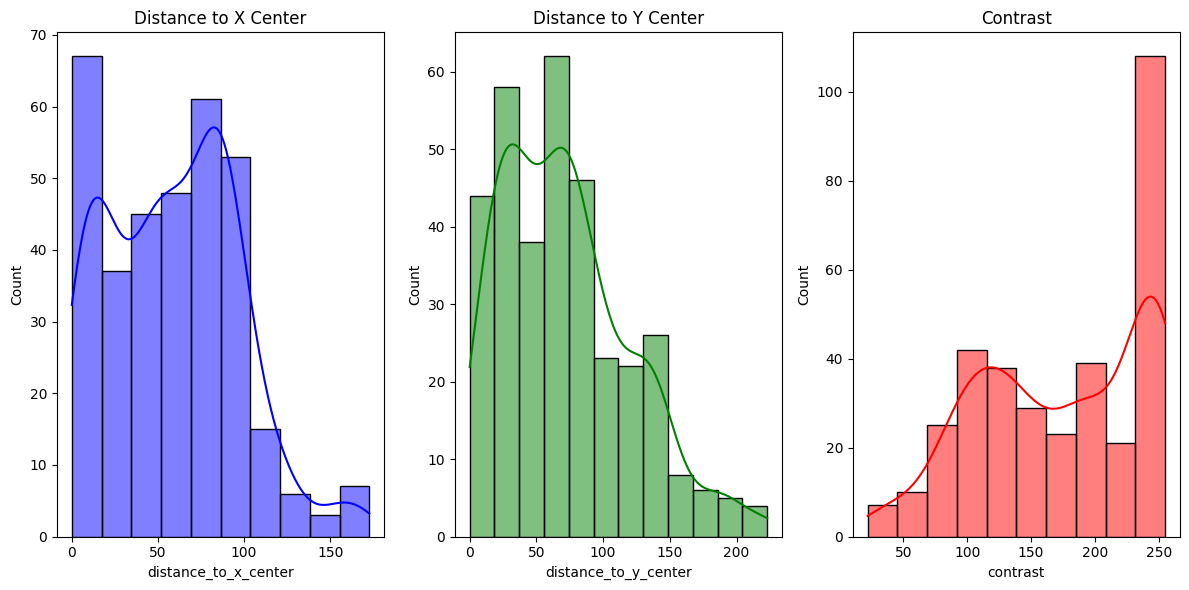

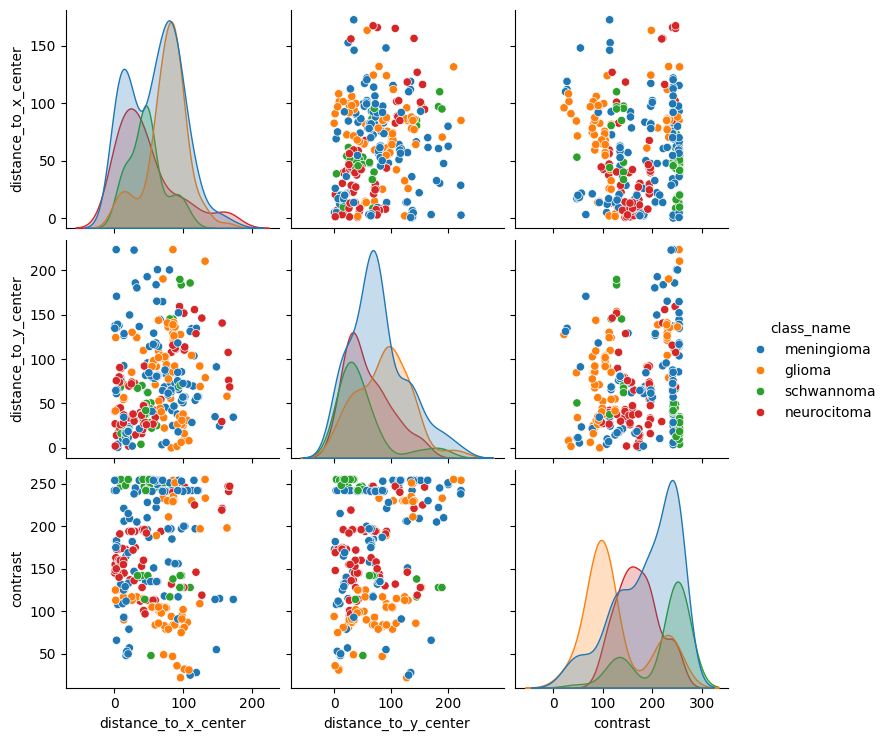

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of each feature
plt.figure(figsize=(12, 6))

# Subplot for distance_to_x_center
plt.subplot(1, 3, 1)
sns.histplot(df['distance_to_x_center'], kde=True, color='blue')
plt.title('Distance to X Center')

# Subplot for distance_to_y_center
plt.subplot(1, 3, 2)
sns.histplot(df['distance_to_y_center'], kde=True, color='green')
plt.title('Distance to Y Center')

# Subplot for contrast
plt.subplot(1, 3, 3)
sns.histplot(df['contrast'], kde=True, color='red')
plt.title('Contrast')

plt.tight_layout()
plt.show()

# Plotting the relationships between features using a pairplot
sns.pairplot(df[['distance_to_x_center', 'distance_to_y_center', 'contrast', 'class_name']], hue='class_name')
plt.show()


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Features and labels
X = df[['distance_to_x_center', 'distance_to_y_center', 'contrast']]
y = df['class_name']

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
reports = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Naive Bayes classifier
    model = GaussianNB(var_smoothing=1e-9)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Append results
    accuracies.append(accuracy)
    reports.append(report)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Print results
print("Average Accuracy across 5 folds:", average_accuracy)
print("\nClassification Report (Last fold):\n", reports[-1])



Average Accuracy across 5 folds: 0.6047314578005115

Classification Report (Last fold):
               precision    recall  f1-score   support

      glioma       0.47      0.69      0.56        13
  meningioma       0.58      0.56      0.57        27
 neurocitoma       0.57      0.47      0.52        17
  schwannoma       0.89      0.73      0.80        11

    accuracy                           0.59        68
   macro avg       0.63      0.61      0.61        68
weighted avg       0.61      0.59      0.59        68



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
model = MLPClassifier(max_iter=1000, random_state=42)

# Grid search for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate on full dataset
y_pred = best_model.predict(X)

# Classification report
print("Best Model:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


/home/gok/Desktop/New Folder 2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gok/Desktop/New Folder 2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gok/Desktop/New Folder 2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gok/Desktop/New Folder 2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converge

Best Model: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Classification Report:
               precision    recall  f1-score   support

      glioma       0.93      0.94      0.93        83
  meningioma       0.88      0.91      0.89       139
 neurocitoma       0.80      0.76      0.78        72
  schwannoma       0.85      0.81      0.83        48

    accuracy                           0.87       342
   macro avg       0.86      0.86      0.86       342
weighted avg       0.87      0.87      0.87       342

Confusion Matrix:
 [[ 78   3   2   0]
 [  4 126   7   2]
 [  1  11  55   5]
 [  1   3   5  39]]


/home/gok/Desktop/New Folder 2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the best model from grid search
best_model = MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(300,), solver='adam', max_iter=1000, random_state=42)

# Perform K-Fold Cross Validation (5 folds)
k = 5
cv_scores = cross_val_score(best_model, X, y, cv=k, scoring='accuracy', n_jobs=-1)

# Output the K-Fold cross-validation results
print(f"Cross-validation scores for {k}-fold:")
print(cv_scores)

# Mean accuracy and standard deviation
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Cross-validation scores for 5-fold:
[0.60869565 0.71014493 0.64705882 0.73529412 0.72058824]
Mean accuracy: 0.6844
Standard deviation: 0.0483


In [14]:
import os
import cv2
import numpy as np
import math
import re
import pandas as pd

def process_yolo_annotations(image_folder, labels_folder):
    """
    Processes YOLO annotations to calculate distances to image center, contrast, and area of bounding boxes.

    Parameters:
        image_folder (str): Path to the folder containing images.
        labels_folder (str): Path to the folder containing YOLO label files.

    Returns:
        DataFrame containing features for each detected object.
    """
    image_names = []
    class_names = []
    center_xs = []
    center_ys = []
    distance_to_x_centers = []
    distance_to_y_centers = []
    total_distances = []
    contrasts = []
    bbox_x1s = []
    bbox_y1s = []
    bbox_x2s = []
    bbox_y2s = []
    areas = []  # List to store the areas of bounding boxes

    image_center_x = image_center_y = 630 / 2  # Image center for 630x630 images

    for label_file in os.listdir(labels_folder):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(labels_folder, label_file)
        
        base_name_match = re.match(r'([a-zA-Z]+)', label_file)
        if not base_name_match:
            print(f"Invalid label file name: {label_file}")
            continue
        base_name = base_name_match.group(1)

        matching_images = [
            img for img in os.listdir(image_folder)
            if img.startswith(base_name) and img.endswith((".jpg", ".jpeg", ".png"))
        ]

        if not matching_images:
            print(f"No matching image found for label {label_file}")
            continue

        image_name = matching_images[0]  # Assuming one match per label
        image_path = os.path.join(image_folder, image_name)

        class_name_match = re.match(r'([a-zA-Z]+)', image_name)
        class_name = class_name_match.group(1) if class_name_match else "unknown"

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Unable to load {image_name}")
            continue

        with open(label_path, 'r') as file:
            for line in file:
                values = line.strip().split()
                if len(values) != 5:
                    continue  # Skip invalid lines

                class_id, center_x, center_y, box_width, box_height = map(float, values)
                center_x *= 630
                center_y *= 630
                box_width *= 630
                box_height *= 630

                # Calculate distances
                distance_to_x_center = abs(center_x - image_center_x)
                distance_to_y_center = abs(center_y - image_center_y)
                total_distance = math.sqrt(distance_to_x_center**2 + distance_to_y_center**2)

                # Extract bounding box region
                x1 = max(0, int(center_x - box_width / 2))
                y1 = max(0, int(center_y - box_height / 2))
                x2 = min(630, int(center_x + box_width / 2))
                y2 = min(630, int(center_y + box_height / 2))
                bbox = image[y1:y2, x1:x2]

                # Calculate contrast
                if bbox.size > 0:
                    contrast = bbox.max() - bbox.min()
                else:
                    contrast = 0

                # Calculate area of the bounding box
                area = box_width * box_height

                # Append the features to the corresponding lists
                image_names.append(image_name)
                class_names.append(class_name)
                center_xs.append(center_x)
                center_ys.append(center_y)
                distance_to_x_centers.append(distance_to_x_center)
                distance_to_y_centers.append(distance_to_y_center)
                total_distances.append(total_distance)
                contrasts.append(contrast)
                bbox_x1s.append(x1)
                bbox_y1s.append(y1)
                bbox_x2s.append(x2)
                bbox_y2s.append(y2)
                areas.append(area)  # Add area to the list

    # Create the DataFrame from the lists
    df = pd.DataFrame({
        'image': image_names,
        'class_name': class_names,
        'center_x': center_xs,
        'center_y': center_ys,
        'distance_to_x_center': distance_to_x_centers,
        'distance_to_y_center': distance_to_y_centers,
        'total_distance': total_distances,
        'contrast': contrasts,
        'bbox_x1': bbox_x1s,
        'bbox_y1': bbox_y1s,
        'bbox_x2': bbox_x2s,
        'bbox_y2': bbox_y2s,
        'area': areas  
    })

    return df

# Example usage
image_folder = '/home/gok/Desktop/New Folder 2/single_line_images3'
labels_folder = '/home/gok/Desktop/New Folder 2/corresponding_text_files'

df = process_yolo_annotations(image_folder, labels_folder)

# Display the DataFrame
print(df)


                   image   class_name   center_x   center_y  \
0    meningioma (40).jpg   meningioma  349.08363  248.00013   
1    meningioma (40).jpg   meningioma  331.83234  325.99980   
2    meningioma (40).jpg   meningioma  430.49979  211.49982   
3      glioma (115).jpeg       glioma  427.00014  211.00023   
4    meningioma (40).jpg   meningioma  394.49970  377.00019   
..                   ...          ...        ...        ...   
337  meningioma (40).jpg   meningioma  317.00025  250.49997   
338  meningioma (40).jpg   meningioma  364.99995  399.50001   
339  meningioma (40).jpg   meningioma  301.49973  349.50006   
340  meningioma (40).jpg   meningioma  407.00016  229.99977   
341  neurocitoma (6).png  neurocitoma  361.50975  341.00010   

     distance_to_x_center  distance_to_y_center  total_distance  contrast  \
0                34.08363              66.99987       75.170981       241   
1                16.83234              10.99980       20.107791        48   
2           

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Features and labels
X = df[['distance_to_x_center', 'distance_to_y_center', 'contrast','area','total_distance']]
y = df['class_name']

# Initialize 5-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

accuracies = []
reports = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Naive Bayes classifier
    model = GaussianNB(var_smoothing=1e-9)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Append results
    accuracies.append(accuracy)
    reports.append(report)

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Print results
print("Average Accuracy across 5 folds:", average_accuracy)
print("\nClassification Report (Last fold):\n", reports[-1])



Average Accuracy across 5 folds: 0.6111111111111112

Classification Report (Last fold):
               precision    recall  f1-score   support

      glioma       0.55      0.64      0.59        25
  meningioma       0.62      0.63      0.62        46
 neurocitoma       0.64      0.62      0.63        26
  schwannoma       0.77      0.59      0.67        17

    accuracy                           0.62       114
   macro avg       0.64      0.62      0.63       114
weighted avg       0.63      0.62      0.62       114



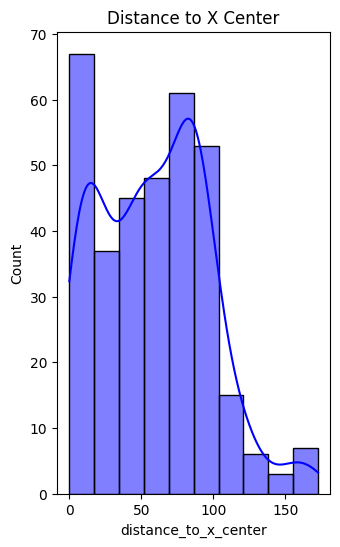

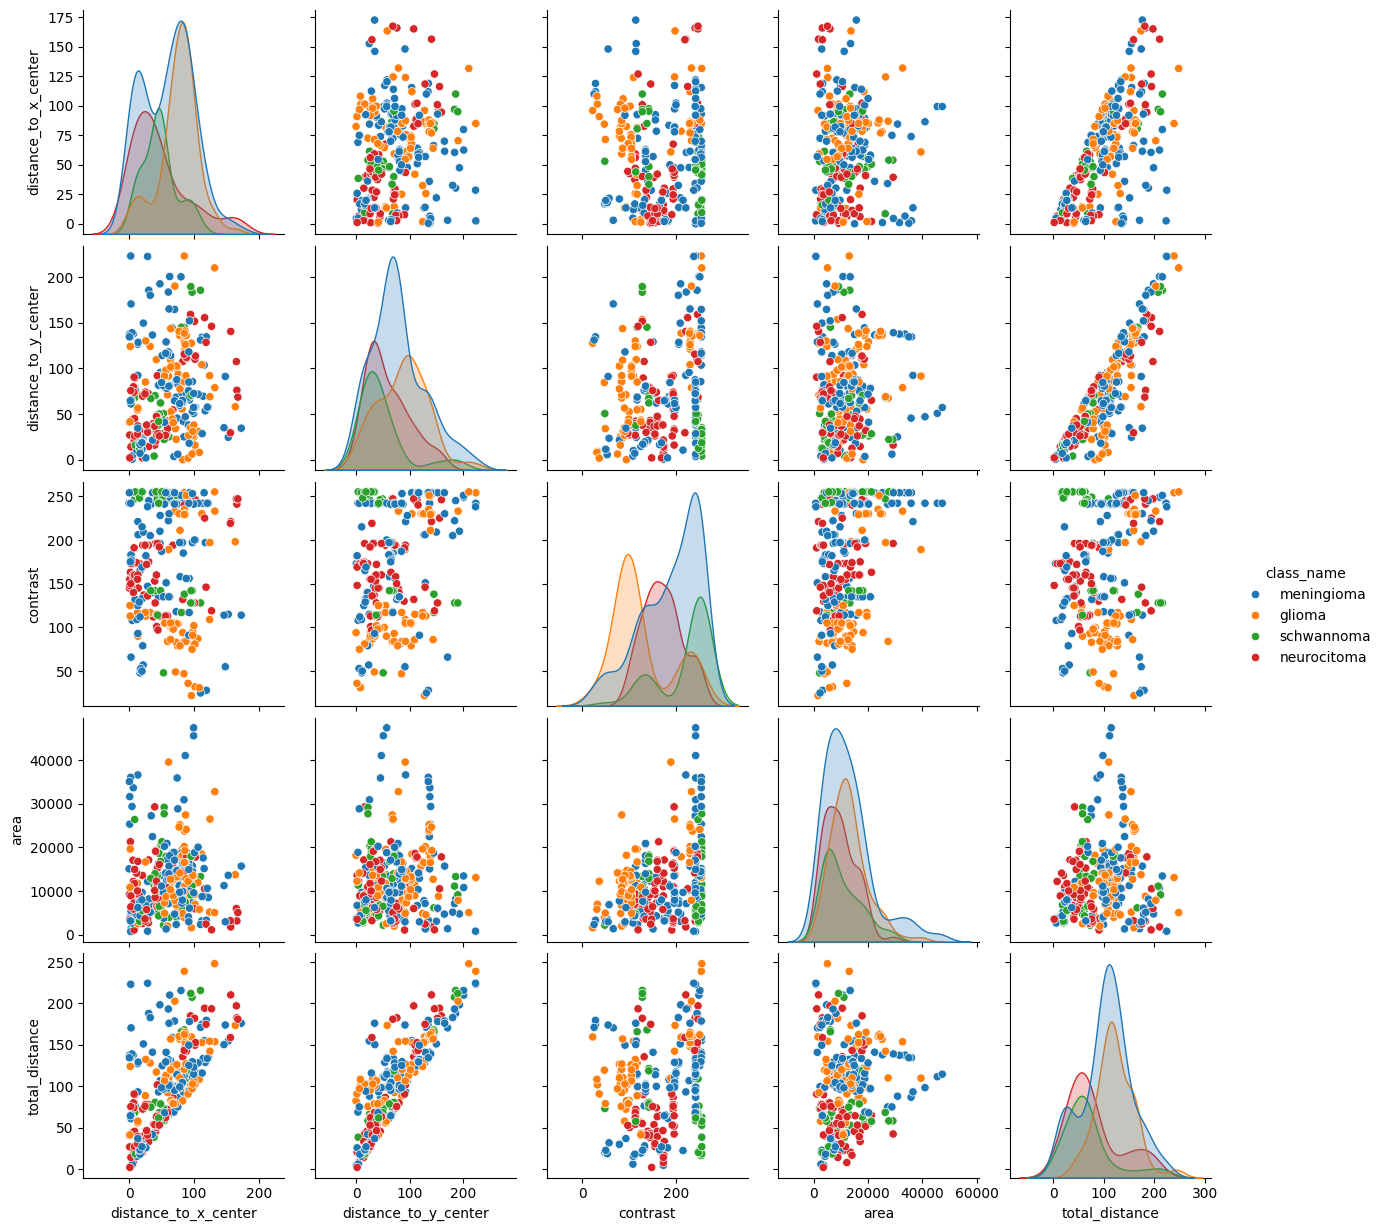

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of each feature
plt.figure(figsize=(12, 6))

# Subplot for distance_to_x_center
plt.subplot(1, 3, 1)
sns.histplot(df['distance_to_x_center'], kde=True, color='blue')
plt.title('Distance to X Center')

# Subplot for distance_to_y_center
# Verify if 'class_name' column exists and is correctly populated
if 'class_name' in df.columns:
    sns.pairplot(df[['distance_to_x_center', 'distance_to_y_center', 'contrast', 'area', 'total_distance', 'class_name']], hue='class_name')
else:
    print("Error: 'class_name' column not found in the DataFrame.")


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

# Train the Random Forest model on the entire training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy on test set:", accuracy)
print("Classification Report on test set:\n", report)

Cross-validation scores: [0.89130435 0.84782609 0.80434783 0.8        0.8       ]
Mean cross-validation score: 0.828695652173913
Standard deviation: 0.036126222744071255
Accuracy on test set: 0.8947368421052632
Classification Report on test set:
               precision    recall  f1-score   support

      glioma       0.89      0.96      0.92        25
  meningioma       0.86      0.96      0.91        46
 neurocitoma       0.96      0.88      0.92        26
  schwannoma       0.92      0.65      0.76        17

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114



In [18]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate

# Step 2: Load a sample dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target



# Step 4: Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform K-fold cross-validation
cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring)

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_results['test_accuracy'])
print("Mean cross-validation accuracy score:", np.mean(cv_results['test_accuracy']))
print("Standard deviation of accuracy:", np.std(cv_results['test_accuracy']))

print("Cross-validation precision scores:", cv_results['test_precision_macro'])
print("Mean cross-validation precision score:", np.mean(cv_results['test_precision_macro']))

print("Cross-validation recall scores:", cv_results['test_recall_macro'])
print("Mean cross-validation recall score:", np.mean(cv_results['test_recall_macro']))

print("Cross-validation F1 scores:", cv_results['test_f1_macro'])
print("Mean cross-validation F1 score:", np.mean(cv_results['test_f1_macro']))

# Train the Random Forest model on the entire training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy on test set:", accuracy)
print("Classification Report on test set:\n", report)

Cross-validation accuracy scores: [0.89130435 0.84782609 0.80434783 0.8        0.8       ]
Mean cross-validation accuracy score: 0.828695652173913
Standard deviation of accuracy: 0.036126222744071255
Cross-validation precision scores: [0.91313131 0.85694444 0.82638889 0.88875    0.78988095]
Mean cross-validation precision score: 0.8550191197691197
Cross-validation recall scores: [0.86805556 0.81892231 0.8291866  0.78472222 0.77777778]
Mean cross-validation recall score: 0.815732892838156
Cross-validation F1 scores: [0.88574772 0.82607211 0.81336032 0.81504003 0.76610672]
Mean cross-validation F1 score: 0.8212653804677933
Accuracy on test set: 0.8947368421052632
Classification Report on test set:
               precision    recall  f1-score   support

      glioma       0.89      0.96      0.92        25
  meningioma       0.86      0.96      0.91        46
 neurocitoma       0.96      0.88      0.92        26
  schwannoma       0.92      0.65      0.76        17

    accuracy          

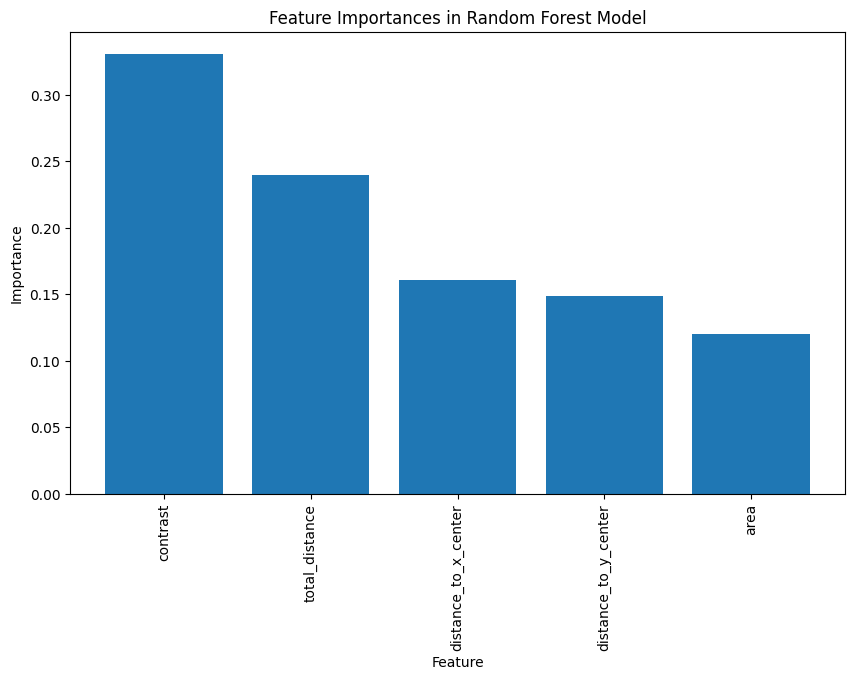

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
